In [1]:
import spacy
import pandas as pd
import numpy as np
from collections import Counter
from glob import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Display plots in this notebook, instead of externally. 
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
%matplotlib inline

import seaborn
import matplotlib.style as style
style.use('seaborn-poster')
import warnings
warnings.filterwarnings('ignore')

/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [2]:
tfidf = TfidfVectorizer(input='filename', decode_error='ignore', use_idf=False)

In [3]:
nlp = spacy.load('en')

In [5]:
inauguralFilenames = sorted(glob('TXTS/*'))

# Make labels by removing the directory name and .txt extension: 
labels = [filename.split('/')[1] for filename in inauguralFilenames]
labels = [filename.split('.')[0] for filename in labels]

# While we're at it, let's make a list of the lengths, so we can use them to plot dot sizes. 
lengths = [len(open(filename, errors='ignore').read())/100 for filename in inauguralFilenames]

# Add a manually compiled list of presidential party affiliations, 
# So that we can use this to color our dots. 
parties = 'rrrbbrrrbbbbbrrbbrrbrrrbbrrbr'

In [6]:
tfidfOut = tfidf.fit_transform(inauguralFilenames)

In [7]:
tfidfOut.shape

(20, 9335)

In [9]:
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(tfidfOut.todense())

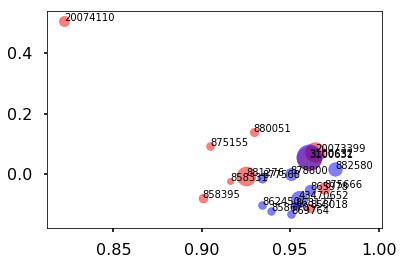

In [10]:
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i], c=parties[i], s=lengths[i], alpha=0.5)
    plt.annotate(labels[i], (xs[i], ys[i]))

In [11]:
inaugural = [nlp(open(doc, errors='ignore').read()) for doc in inauguralFilenames]

In [12]:
sentLengths = [ np.mean([len(sent) for sent in doc.sents]) for doc in inaugural ]

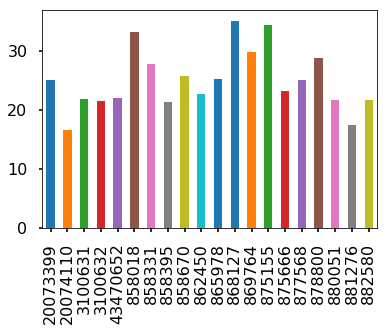

In [14]:
pd.Series(sentLengths, index=labels).plot(kind='bar')

In [15]:
# Create a Pandas Data Frame with each word counted in each document, 
# divided by the length of the document. 
inauguralSeries = [pd.Series(Counter(   
                    [word.string.strip().lower() 
                     for word in doc]))/len(doc) 
                     for doc in inaugural]
seriesDict = {label: series for label, series in zip(labels, inauguralSeries)}
inauguralDf = pd.DataFrame(seriesDict).T.fillna(0)

In [16]:
inauguralDf.head()

,,!,"""",#,$,%,&,','.36,'em,...,{,~,~':''::':::e~,~7*~~~~,~?r,~apt,~i,~li-,~p,~~ii~
20073399,0.080596,0.000123,0.002953,0.000000,0.000000,0.000000,0.000492,0.032484,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
20074110,0.097539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000447,0.001342,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
3100631,0.069717,0.000232,0.001314,0.000000,0.000000,0.000077,0.000309,0.022646,0.000000,0.000077,...,0.000000,0.000541,0.0,0.000077,0.000077,0.000077,0.0,0.0,0.000077,0.0
3100632,0.073487,0.000218,0.001091,0.000073,0.000146,0.000073,0.000146,0.020154,0.000073,0.000000,...,0.000000,0.000218,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
43470652,0.072525,0.000000,0.026854,0.000000,0.000000,0.000000,0.000365,0.001644,0.000000,0.000000,...,0.000365,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


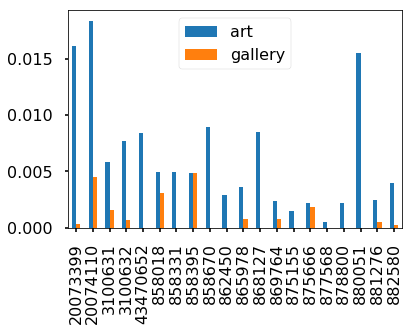

In [20]:
inauguralDf[['art', 'gallery']].plot(kind='bar')

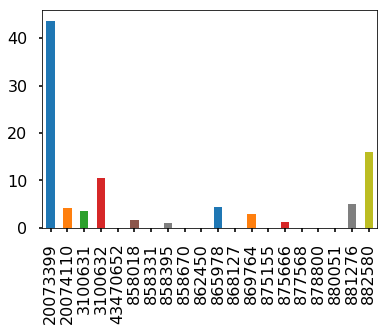

In [22]:
americaWorldRatio = inauguralDf['art']/inauguralDf['gallery']
americaWorldRatio.plot(kind='bar')

In [23]:
similarities = [ [doc.similarity(other) for other in inaugural] for doc in inaugural ]
similaritiesDf = pd.DataFrame(similarities, columns=labels, index=labels)

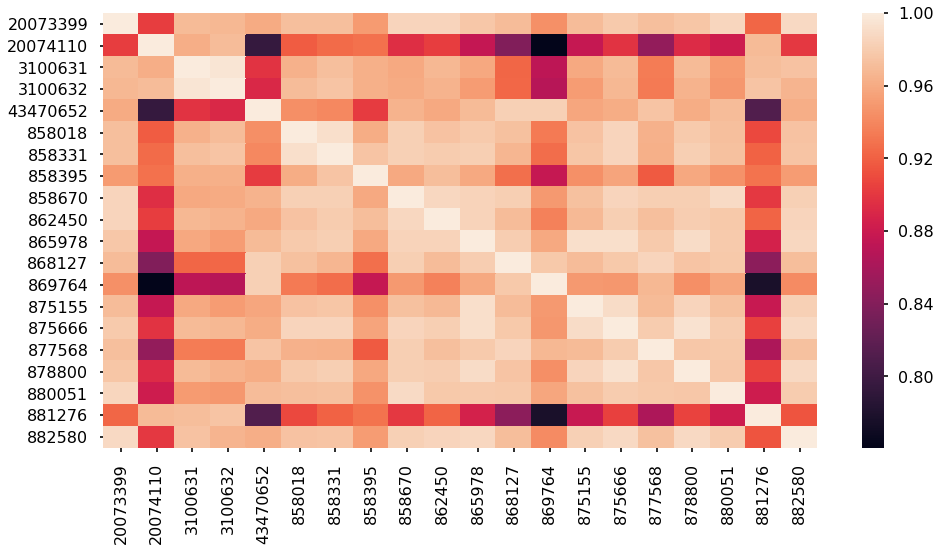

In [24]:
# Requires the Seaborn library. 
rcParams['figure.figsize'] = 16, 8
seaborn.heatmap(similaritiesDf)